# Library Imports

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [76]:
pd.set_option('display.max_rows', 500)

# Tracks Streaming Data

## Data Exploration / EDA

In [33]:
# let's load the tracks_df again
tracks_df = pd.read_csv('datasets/tracks_df.csv')
tracks_df.sample(5)

C:\Users\Kim\AppData\Local\Temp\ipykernel_21264\4189168743.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks_df = pd.read_csv('datasets/tracks_df.csv')


,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
108446,2022-12-16T23:36:32Z,android,3808,JP,Here Comes The Sun (feat. dodie),Jacob Collier,Here Comes The Sun (feat. dodie),spotify:track:2KQlkzT8Gg1lFDU0y5TYeK,NaN,NaN,NaN,fwdbtn,fwdbtn,True,1.0,False,1671233788,False
77985,2021-06-10T06:25:43Z,"Android OS 10 API 29 (OnePlus, ONEPLUS A5010)",74816,JP,let's be lazy together,biosphere,Summer Festival,spotify:track:55hgAzy1kaC0Cn7EFxDeUz,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1623306265036,False
45577,2019-05-26T05:04:10Z,"Android OS 9 API 28 (OnePlus, ONEPLUS A5010)",4586,JP,Smells Like Teen Spirit,Nirvana,Nevermind,spotify:track:1f3yAtsJtY87CTmM8RLnxf,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1558847044624,False
15699,2017-12-10T09:33:52Z,"Android OS 7.1.1 API 25 (Sony, E6683)",781,ID,Cold Sun,Aimer,Midnight Sun,spotify:track:2PH4A0uzqE8DSinxxETZrE,NaN,NaN,NaN,fwdbtn,NaN,True,NaN,False,1512898432125,False
96332,2022-06-09T18:21:06Z,"Android OS 11 API 30 (OnePlus, HD1910)",218706,JP,LUCID,Rina Sawayama,SAWAYAMA,spotify:track:7BoVAJ0HuKcBBRmUGlzX6o,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1654798646398,False


In [3]:
print(tracks_df.shape)
print(tracks_df.columns)

(129393, 18)
Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')


In [4]:
# let's take a look at the tracks_df again
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129393 entries, 0 to 129392
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 129393 non-null  object 
 1   platform                           129393 non-null  object 
 2   ms_played                          129393 non-null  int64  
 3   conn_country                       129393 non-null  object 
 4   master_metadata_track_name         129393 non-null  object 
 5   master_metadata_album_artist_name  129393 non-null  object 
 6   master_metadata_album_album_name   129393 non-null  object 
 7   spotify_track_uri                  129393 non-null  object 
 8   episode_name                       0 non-null       float64
 9   episode_show_name                  0 non-null       float64
 10  spotify_episode_uri                0 non-null       float64
 11  reason_start                       1293

Columns description
- ts : timestamp played
- ms_played : duration the track is played (ms)
- conn_country : country where the track was played
- master_metadata_track_name / artist_name / album_name : self explained
- spotify_track_uri : unique identifier for each track
- episode_name, episode_show_name, spotify_episode_uri : columns used for podcasts-related rows, might need to remove this later
- reason_start / end : a value telling why track is played
- shuffle / skipped / offline / incognito_mode : value whether the track if shuffle mode is used when the track is played, track skipped or when the track is played in offline mode or incognito_mode
- offline_timestamp : timestamp when the offline mode is used

In [5]:
# checking the number of unique from each column
tracks_df.nunique()

ts                                   121914
platform                                 32
ms_played                             26468
conn_country                              9
master_metadata_track_name             4783
master_metadata_album_artist_name      1646
master_metadata_album_album_name       2700
spotify_track_uri                      5245
episode_name                              0
episode_show_name                         0
spotify_episode_uri                       0
reason_start                              8
reason_end                               10
shuffle                                   2
skipped                                   4
offline                                   2
offline_timestamp                    127519
incognito_mode                            2
dtype: int64

In [6]:
# descriptive analysis for categorical data
tracks_df.describe(include='object')

,ts,platform,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,skipped
count,129393,129393,129393,129393,129393,129393,129393,129393,108855,23972
unique,121914,32,9,4783,1646,2700,5245,8,10,4
top,2019-06-28T06:57:01Z,"Android OS 11 API 30 (OnePlus, HD1910)",JP,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,Church Of Scars,spotify:track:1HW1arhhmKY3jI7QyARvsf,trackdone,trackdone,False
freq,208,21563,103209,762,11074,3173,762,96588,82153,17475


In [7]:
# descriptive analysis for numerical data
tracks_df.describe()

,ms_played,episode_name,episode_show_name,spotify_episode_uri,offline_timestamp
count,1.293930e+05,0.0,0.0,0.0,1.293930e+05
mean,1.569280e+05,NaN,NaN,NaN,1.268591e+12
std,9.212008e+04,NaN,NaN,NaN,6.274175e+11
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,9.120000e+04,NaN,NaN,NaN,1.498709e+12
50%,1.829730e+05,NaN,NaN,NaN,1.551874e+12
75%,2.162130e+05,NaN,NaN,NaN,1.610864e+12
max,1.082813e+06,NaN,NaN,NaN,1.665763e+12


<Axes: xlabel='ms_played', ylabel='Count'>

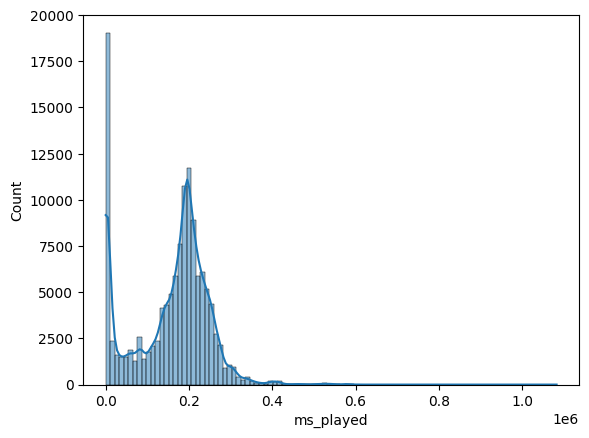

In [8]:
# histogram for ms_played rounded to nearest 1000 (in seconds) to see the distribution
sns.histplot(tracks_df['ms_played'].round(-3), kde = True, bins=100)

In [9]:
display(tracks_df[tracks_df['ms_played'] == 0].sample(5))
print(tracks_df[tracks_df['ms_played'] == 0].shape)

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
8849,2017-07-07T11:55:12Z,"Android OS 7.1.1 API 25 (Sony, E6683)",0,ID,I Don't Know and I Don't Want to Know,In Love With a Ghost,Discography 2015-2016,spotify:track:600wewdSes7BMxXmm6UD7M,NaN,NaN,NaN,fwdbtn,NaN,True,NaN,False,1499428511363,False
128754,2023-11-06T06:09:01Z,android,0,JP,how can i pretend? - Demo,Wasia Project,how can i pretend?,spotify:track:4TKxkBv9vy8MgvHUUFVbH0,NaN,NaN,NaN,fwdbtn,backbtn,True,True,False,1699250939,False
13544,2017-11-06T11:51:33Z,"Android OS 7.1.1 API 25 (Sony, E6683)",0,ID,Castle on the Hill,Ed Sheeran,÷,spotify:track:6PCUP3dWmTjcTtXY02oFdT,NaN,NaN,NaN,appload,NaN,True,NaN,False,1509969061690,False
22856,2018-05-26T13:39:37Z,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",0,JP,Mr. Blue Sky,Electric Light Orchestra,Out of the Blue,spotify:track:2RlgNHKcydI9sayD2Df2xp,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1527341975948,False
24049,2018-06-09T08:30:40Z,"Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)",0,JP,I Just Loved You (feat. Tomppabeats & Oiseaubi...,In Love With a Ghost,Discography 2015-2016,spotify:track:51NwEhU00taacC9npdji7W,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1528533036354,False


(3759, 18)


there are surprisingly a lot of rows with 0 ms_played, might need to check it later

In [10]:
# checking platform unique values
tracks_df['platform'].value_counts(dropna=False)

platform
Android OS 11 API 30 (OnePlus, HD1910)                       21563
android                                                      20780
Android OS 9 API 28 (OnePlus, ONEPLUS A5010)                 15578
Android OS 10 API 29 (OnePlus, ONEPLUS A5010)                15124
Android OS 8.1.0 API 27 (OnePlus, ONEPLUS A5010)             10919
Windows 10 (10.0.17134; x64)                                  7099
Android OS 7.1.1 API 25 (Sony, E6683)                         6847
Windows 10 (10.0.14393; x64)                                  6764
Windows 10 (10.0.18363; x64)                                  6702
Android OS 7.0 API 24 (Sony, E6683)                           4074
windows                                                       3192
Windows 10 (10.0.18362; x64)                                  2858
Android OS 8.0.0 API 26 (OnePlus, ONEPLUS A5010)              1049
Windows 10 (10.0.16299; x64)                                  1011
Android OS 6.0.1 API 23 (Sony, E6683)                

it seems there are just 3 unique values in platform column (android, windows, web_player), we need to handle this value

In [11]:
# checking the unique values in 'skipped' column, including 'NaN'
tracks_df['skipped'].value_counts(dropna=False)

skipped
NaN      105421
False     17475
0.0        3581
True       2065
1.0         851
Name: count, dtype: int64

In [13]:
# show the rows with 'skipped' value of 'NaN'
tracks_df[tracks_df['skipped'].isna()]['reason_end'].value_counts(dropna=False)

reason_end
trackdone                       62298
NaN                             20538
fwdbtn                           9239
backbtn                          4805
logout                           3845
endplay                          3118
remote                            966
unexpected-exit-while-paused      433
unexpected-exit                    64
trackerror                         63
unknown                            52
Name: count, dtype: int64

In [15]:
tracks_df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

In [23]:
tracks_df[tracks_df['skipped'].isna() & tracks_df['reason_end'].isna()] \
[['master_metadata_track_name', 'master_metadata_album_artist_name', 'reason_end', 'skipped', 'ms_played']].sample(5)

,master_metadata_track_name,master_metadata_album_artist_name,reason_end,skipped,ms_played
632,Time Stops,Virtual Riot,NaN,NaN,262725
14612,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,NaN,NaN,148500
993,The Cabin,Ylvis,NaN,NaN,248158
12599,Everything Is Gonna Be Alright,Wyolica,NaN,NaN,234200
15564,Breathe (feat. Danyka Nadeau),Tut Tut Child,NaN,NaN,275121


we also need to handle 'skipped' value as it seems they are just a boolean data type and handle the NaN values

In [20]:
# checking the unique values in 'shuffle' column
tracks_df['shuffle'].value_counts(dropna=False)

shuffle
True     77246
False    52147
Name: count, dtype: int64

In [21]:
# checking the unique values in 'offline' column
tracks_df['offline'].value_counts(dropna=False)

offline
False    123422
True       5971
Name: count, dtype: int64

In [22]:
# checking the unique values in 'incognito_mode' column
tracks_df['incognito_mode'].value_counts(dropna=False)

incognito_mode
False    129076
True        317
Name: count, dtype: int64

shuffle, offline and incognito_mode's value are pretty much complete and has no NaN values

In [ ]:
# checking the unique values in 'reason_start' column
print(tracks_df['reason_start'].value_counts(dropna=False))

reason_start
trackdone     96588
fwdbtn        13695
backbtn        7344
clickrow       5919
appload        4161
remote          690
playbtn         649
trackerror      347
Name: count, dtype: int64


In [ ]:
# checking the unique values in 'reason_end' column
print(tracks_df['reason_end'].value_counts(dropna=False))

reason_end
trackdone                       82153
NaN                             20538
fwdbtn                          11078
backbtn                          5250
logout                           4835
endplay                          3750
remote                           1071
unexpected-exit-while-paused      533
unexpected-exit                    68
trackerror                         63
unknown                            54
Name: count, dtype: int64


based on what we've seen, there are some things that we need to handle:
- drop podcasts related columns [DONE]
- drop offline_timestamp column [DONE]
- ~~drop conn_country column since I think what _platform_ the track was streamed is more important than the _country_ it was streamed~~
- convert 'ts' column into datetime datatype [DONE]
- convert 'ts' based on the conn_country [DONE]
- create 'hour' and 'day_of_week" columns based on the local time
- rename columns with long label (master_metadata_artist_name, etc) into shorter form [DONE]
- trim spotify_track_uri to only track ids [DONE]
- handle _platform_ into three values (web_player, android, windows) [DONE]
- handle _skipped_ into True or False
- handle _skipped_'s NaN value based on _reason end_
- take a look on rows with 0 ms_played 

## Data Preprocessing

### dropping unimportant columns

In [34]:
# dropping the columns that are not useful
tracks_df.drop(columns=['offline_timestamp', 'episode_name', 'episode_show_name', 'spotify_episode_uri'], inplace=True)


### handling 'ts' and 'conn_country' column
there are some things that we need to do here:
- convert 'ts' to datetime
- check unique values of conn_country
- fix the mislabelled rows
- convert 'ts' into its proper timezone

In [35]:
# converting 'ts' to datetime format
tracks_df['ts'] = pd.to_datetime(tracks_df['ts'])

In [36]:
tracks_df['conn_country'].value_counts(dropna=False)

conn_country
JP    103209
ID     24904
SG       614
MY       334
PH       279
CA        32
US        13
ZZ         5
BV         3
Name: count, dtype: int64

it appears that conn_country are mislabelled, because I have never been to CA / US / ZZ / BV.
this mislabelling might caused by some error or because I happened to be on vpn while listening to spotify.
since the quantity of mislabelled rows are not that significant, we can just remove these rows.

but I will see if we can assign them accordingly (since the quantity is also not that many)

In [37]:
# store the date of rows with 'conn_country' value of CA, US, ZZ and BV into a list
mislabelled_conn_country_date = tracks_df[tracks_df['conn_country'].isin(['CA', 'US', 'ZZ', 'BV'])]['ts'].dt.date.unique().tolist()

In [38]:
mislabelled_conn_country_date

[datetime.date(2017, 8, 25),
 datetime.date(2017, 11, 6),
 datetime.date(2018, 7, 27),
 datetime.date(2019, 10, 22),
 datetime.date(2021, 8, 31),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 11, 28),
 datetime.date(2021, 12, 2),
 datetime.date(2022, 6, 17),
 datetime.date(2022, 7, 17),
 datetime.date(2022, 8, 25),
 datetime.date(2022, 12, 10),
 datetime.date(2023, 1, 19),
 datetime.date(2023, 1, 29)]

In [39]:
# show the unique value of conn_country on each day in the list and store the most frequent value into a dictionary of date:country
conn_country_dict = {}
for date in mislabelled_conn_country_date:
    conn_country_dict[date] = tracks_df[tracks_df['ts'].dt.date == date]['conn_country'].value_counts().index[0]

In [40]:
conn_country_dict

{datetime.date(2017, 8, 25): 'ID',
 datetime.date(2017, 11, 6): 'ID',
 datetime.date(2018, 7, 27): 'JP',
 datetime.date(2019, 10, 22): 'JP',
 datetime.date(2021, 8, 31): 'JP',
 datetime.date(2021, 9, 1): 'JP',
 datetime.date(2021, 11, 28): 'JP',
 datetime.date(2021, 12, 2): 'JP',
 datetime.date(2022, 6, 17): 'JP',
 datetime.date(2022, 7, 17): 'ID',
 datetime.date(2022, 8, 25): 'JP',
 datetime.date(2022, 12, 10): 'JP',
 datetime.date(2023, 1, 19): 'JP',
 datetime.date(2023, 1, 29): 'JP'}

In [41]:
# replace the mislabelled conn_country with the correct country
tracks_df['conn_country'] = tracks_df.apply(lambda x: conn_country_dict[x['ts'].date()] if x['conn_country'] in ['CA', 'US', 'ZZ', 'BV'] else x['conn_country'], axis=1)

In [42]:
# check the unique values in 'conn_country' column again
tracks_df['conn_country'].value_counts(dropna=False)

conn_country
JP    103256
ID     24910
SG       614
MY       334
PH       279
Name: count, dtype: int64

In [43]:
import pytz

In [44]:
# Function to convert timezone and extract hour and day of week
def convert_and_extract(row):
    # Get the appropriate timezone
    country_tz = pytz.country_timezones(row['conn_country'])[0]
    local_time = row['ts'].tz_convert(pytz.timezone(country_tz))
    
    # Extract hour and day of week
    hour = local_time.hour
    day_of_week = local_time.strftime('%A')
    
    return pd.Series([local_time, hour, day_of_week])

# Apply the function to extract local time, hour, and day of week
tracks_df[['ts_local', 'hour', 'day_of_week']] = tracks_df.apply(convert_and_extract, axis=1)


In [45]:
# show 5 rows for each conn_country
for country in tracks_df['conn_country'].unique():
    print(country)
    display(tracks_df[tracks_df['conn_country'] == country][['ts', 'ts_local', 'hour', 'day_of_week', 'conn_country']].sample(5))

ID


,ts,ts_local,hour,day_of_week,conn_country
13304,2017-11-01 14:08:08+00:00,2017-11-01 21:08:08+07:00,21,Wednesday,ID
2297,2017-03-10 11:06:28+00:00,2017-03-10 18:06:28+07:00,18,Friday,ID
49498,2019-08-29 10:08:44+00:00,2019-08-29 17:08:44+07:00,17,Thursday,ID
121266,2023-06-28 04:12:27+00:00,2023-06-28 11:12:27+07:00,11,Wednesday,ID
11607,2017-09-28 20:07:10+00:00,2017-09-29 03:07:10+07:00,3,Friday,ID


JP


,ts,ts_local,hour,day_of_week,conn_country
70346,2020-11-23 08:26:59+00:00,2020-11-23 17:26:59+09:00,17,Monday,JP
104566,2022-09-28 05:57:53+00:00,2022-09-28 14:57:53+09:00,14,Wednesday,JP
55657,2020-02-04 09:45:41+00:00,2020-02-04 18:45:41+09:00,18,Tuesday,JP
51082,2019-09-21 02:09:15+00:00,2019-09-21 11:09:15+09:00,11,Saturday,JP
121974,2023-07-07 01:22:39+00:00,2023-07-07 10:22:39+09:00,10,Friday,JP


MY


,ts,ts_local,hour,day_of_week,conn_country
43811,2019-04-28 02:18:54+00:00,2019-04-28 10:18:54+08:00,10,Sunday,MY
121472,2023-07-03 11:41:42+00:00,2023-07-03 19:41:42+08:00,19,Monday,MY
119881,2023-06-15 02:59:26+00:00,2023-06-15 10:59:26+08:00,10,Thursday,MY
43188,2019-04-15 19:53:09+00:00,2019-04-16 03:53:09+08:00,3,Tuesday,MY
43198,2019-04-15 19:53:09+00:00,2019-04-16 03:53:09+08:00,3,Tuesday,MY


SG


,ts,ts_local,hour,day_of_week,conn_country
120043,2023-06-15 22:50:18+00:00,2023-06-16 06:50:18+08:00,6,Friday,SG
111084,2023-01-30 10:56:21+00:00,2023-01-30 18:56:21+08:00,18,Monday,SG
111074,2023-01-30 10:22:37+00:00,2023-01-30 18:22:37+08:00,18,Monday,SG
88923,2021-12-20 02:30:25+00:00,2021-12-20 10:30:25+08:00,10,Monday,SG
121078,2023-06-27 01:01:58+00:00,2023-06-27 09:01:58+08:00,9,Tuesday,SG


PH


,ts,ts_local,hour,day_of_week,conn_country
97255,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH
99780,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH
99794,2022-07-20 23:26:05+00:00,2022-07-21 07:26:05+08:00,7,Thursday,PH
97330,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH
97304,2022-06-19 11:55:55+00:00,2022-06-19 19:55:55+08:00,19,Sunday,PH


### renaming columns with long label

In [46]:
# renaming master_metadata_track_name, master_metadata_album_artist_name, and master_metadata_album_album_name into track_name, artist_name, and album_name
tracks_df.rename(columns={'master_metadata_track_name':'track_name', 'master_metadata_album_artist_name':'artist_name', 'master_metadata_album_album_name':'album_name'}, inplace=True)

In [47]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,spotify_track_uri,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local,hour,day_of_week
57228,2020-04-08 20:47:08+00:00,Windows 10 (10.0.18363; x64),194000,JP,Baby,Bishop Briggs,Baby,spotify:track:21vwWfS6qvxh8TN3lgHvZr,trackdone,trackdone,True,NaN,False,False,2020-04-09 05:47:08+09:00,5,Thursday
92755,2022-03-11 15:05:36+00:00,"Android OS 11 API 30 (OnePlus, HD1910)",194445,JP,アンドロン,Chilli Beans.,Daydream,spotify:track:3BbP5ms25VMtHnJNZvTs2Y,trackdone,trackdone,True,NaN,False,False,2022-03-12 00:05:36+09:00,0,Saturday
45001,2019-05-16 11:39:11+00:00,"Android OS 9 API 28 (OnePlus, ONEPLUS A5010)",818,JP,Wicked Ways,Killabyte,Wicked Ways,spotify:track:1u8rZf2jsugtBPcWPEKnjV,fwdbtn,fwdbtn,False,NaN,False,False,2019-05-16 20:39:11+09:00,20,Thursday
105083,2022-10-10 06:36:33+00:00,"Android OS 11 API 30 (OnePlus, HD1910)",264873,JP,My Own Person,Ezra Williams,My Own Person,spotify:track:0o0BtyLhvu05czmflES2tH,trackdone,trackdone,False,NaN,False,False,2022-10-10 15:36:33+09:00,15,Monday
3023,2017-03-21 05:06:11+00:00,Windows 10 (10.0.14393; x64),228031,ID,Surreal (Feat. Abby Sevcik),Mielo,Surreal (Feat. Abby Sevcik),spotify:track:2TNmy12Kv86t5Wt0LMDfIT,trackdone,NaN,True,NaN,False,False,2017-03-21 12:06:11+07:00,12,Tuesday


### handling platform columns

In [48]:
# trim the platform values to only the first word and make it lowercase
tracks_df['platform'] = tracks_df['platform'].str.split().str[0].str.lower()

# replace 'partner' value in platform column with 'web_player'
tracks_df['platform'].replace('partner', 'web_player', inplace=True)

C:\Users\Kim\AppData\Local\Temp\ipykernel_21264\3275832675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tracks_df['platform'].replace('partner', 'web_player', inplace=True)


In [50]:
tracks_df['platform'].value_counts()

platform
android       97301
windows       32015
web_player       77
Name: count, dtype: int64

### handling spotify_track_uri to only track_id

In [51]:
# trim spotify_track_uri to only the track id and rename the column into track_id
tracks_df['spotify_track_uri'] = tracks_df['spotify_track_uri'].str.split(':').str[2]
tracks_df.rename(columns={'spotify_track_uri':'track_id'}, inplace=True)

In [52]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local,hour,day_of_week
9898,2017-08-01 01:55:29+00:00,android,962,ID,No.1,Kana Nishino,Secret Collection,6HH1qlyyVAAJzbctS0OYKB,fwdbtn,NaN,True,NaN,False,False,2017-08-01 08:55:29+07:00,8,Tuesday
95285,2022-05-23 16:38:06+00:00,android,417,JP,Clearest Blue,CHVRCHES,Every Open Eye,0ptjIq1XKNYBtfjzXQ3dXE,backbtn,backbtn,False,NaN,False,False,2022-05-24 01:38:06+09:00,1,Tuesday
18005,2018-01-11 08:01:30+00:00,android,240848,ID,BOOMBAYAH,BLACKPINK,SQUARE ONE,3yHQKddM8SVCRnuPSo3HPN,trackdone,NaN,False,NaN,False,False,2018-01-11 15:01:30+07:00,15,Thursday
52643,2019-11-02 23:30:36+00:00,android,492,JP,Thoughts,In Love With a Ghost,Discography 2015-2016,6Z7RZRCnM3oLktccT2Bgbm,backbtn,backbtn,False,NaN,False,False,2019-11-03 08:30:36+09:00,8,Sunday
16757,2017-12-22 12:09:30+00:00,android,196173,ID,Rice Balls,Pink Guy,Pink Season,7zvKFw17XyoBUx9mHiwzPy,trackdone,NaN,False,NaN,True,False,2017-12-22 19:09:30+07:00,19,Friday


### handling 'skipped' column
there are few things that we need to do here:
- turn the values into True/False to make it uniform with other columns
- assign NaN rows with its correct value as many as possible using reason_end and track's duration 

In [53]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
NaN      105421
False     17475
0.0        3581
True       2065
1.0         851
Name: count, dtype: int64

In [54]:
tracks_df['skipped'] = tracks_df['skipped'].replace({'False': False, '0.0': False, 'True': True, '1.0': True})
tracks_df['skipped'] = tracks_df['skipped'].astype('boolean') #so that it can store True, False, and NaN


In [55]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
<NA>     105421
False     21056
True       2916
Name: count, dtype: Int64

In [61]:
# first, let's see the combination of 'skipped' and 'reason_end' values, including 'NaN'
tracks_df.groupby(['skipped', 'reason_end'], dropna=False).size().unstack()

reason_end,backbtn,endplay,fwdbtn,logout,remote,trackdone,trackerror,unexpected-exit,unexpected-exit-while-paused,unknown,NaN
skipped,,,,,,,,,,,
False,NaN,NaN,NaN,990.0,105.0,19855.0,NaN,4.0,100.0,2.0,NaN
True,445.0,632.0,1839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<NA>,4805.0,3118.0,9239.0,3845.0,966.0,62298.0,63.0,64.0,433.0,52.0,20538.0


based on the table above, we can see that:
- Skipped == False happens mostly when the reason_end of the track is either trackdone, or the user exit the apps
- Skipped == True happens when the user pressed the backbutton, endplay or forwardbutton to either navigate to other song, pause or replay the song (pressing backbutton here means that the track will be replayed from the beginning)
based on this finding, we can fill a part of NaN value of the 'skipped' columns

In [62]:
# Define a function to fill NaN in 'skipped' based on 'reason_end'
def fill_skipped(row):
    if pd.isna(row['skipped']):
        if row['reason_end'] in ['fwdbtn', 'backbtn', 'endplay']:
            return True 
        elif row['reason_end'] in ['logout', 'remote', 'trackdone', 'trackerror', 'unexpected-exit', 'unexpected-exit-while-paused']:
            return False
    return row['skipped'] # Return the original value if not NaN or reason_end is not in the specified list

# Apply the function row by row
tracks_df['skipped'] = tracks_df.apply(fill_skipped, axis=1)


In [63]:
tracks_df['skipped'].value_counts(dropna=False)

skipped
False    88725
<NA>     20590
True     20078
Name: count, dtype: int64

great, we are able to cut down some NaN values in skipped, but we are not done yet.
next, I would like to see how the 'ms_played' of the NaN rows when compared to the track duration (combining from track_info data)

In [56]:
# get track_info to get each track information
track_info = pd.read_csv('datasets/tracks_info_df.csv')
# let's keep the columns that we need only
track_info = track_info[['track_id', 'duration_ms']]

In [69]:
display(tracks_df.sample(5))
display(track_info.sample(5))

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local,hour,day_of_week
14454,2017-11-21 15:28:09+00:00,windows,148500,ID,Interdimensional Portal Leading to a Cute Plac...,In Love With a Ghost,Interdimensional Portal Leading to a Cute Plac...,1HW1arhhmKY3jI7QyARvsf,trackdone,NaN,True,<NA>,False,False,2017-11-21 22:28:09+07:00,22,Tuesday
33017,2018-10-28 03:58:01+00:00,android,84705,JP,feeling empty because there's no more spaghetti,In Love With a Ghost,gay story,1YGmfMC5FqaYZqa8RioLqr,trackdone,trackdone,True,False,True,False,2018-10-28 12:58:01+09:00,12,Sunday
6395,2017-05-15 04:11:43+00:00,android,230243,ID,"I Was Feeling Down, I Found a Nice Witch and W...",In Love With a Ghost,Healing,2Csg0XMPdNmHLozWODtsQq,trackdone,NaN,True,<NA>,False,False,2017-05-15 11:11:43+07:00,11,Monday
13838,2017-11-11 06:12:45+00:00,windows,244960,ID,Closer,The Chainsmokers,Closer,7BKLCZ1jbUBVqRi2FVlTVw,trackdone,NaN,True,<NA>,False,False,2017-11-11 13:12:45+07:00,13,Saturday
122700,2023-07-18 02:08:17+00:00,android,192248,JP,La La La,Us The Duo,Up Until Now,5ahstBPUDe1yol0HYT2WRQ,backbtn,trackdone,True,False,False,False,2023-07-18 11:08:17+09:00,11,Tuesday


,track_id,duration_ms
4135,2ssjMn6LLPJl3dzF7bHna0,116923
4516,0xmWQKzc5m9rLv2ucDWxwD,236426
5111,3geMf9Ada0dHExUvSZKi5S,211480
3894,7FQwu9yL27zkMIeiHvxWr5,191135
3751,2UUVwDVZYR5StS7Si0SxrP,198389


In [70]:
# get the duration from track_info and merge it with tracks_df based on track_id
tracks_df = tracks_df.merge(track_info, on='track_id', how='left')

In [78]:
# store a label for a shorter syntax
skipped_labels = ['track_id', 'reason_start', 'reason_end', 'skipped', 'ms_played', 'duration_ms']

In [83]:
tracks_df[(tracks_df['reason_end'] == 'trackdone')
          & (tracks_df['ms_played'] < tracks_df['duration_ms'])] \
            [skipped_labels]

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms
40,1x59YtDtw7jPZTxqNYmhq2,appload,trackdone,False,394449,417314
20613,0XodGPHuylQUaoe1Gba2jF,appload,trackdone,False,4263,185177
20644,2ju2QeVgFtJM3gLQZKj6i9,appload,trackdone,False,336762,336782
20651,2ju2QeVgFtJM3gLQZKj6i9,appload,trackdone,False,279623,336782
20685,2ju2QeVgFtJM3gLQZKj6i9,appload,trackdone,False,294595,336782
...,...,...,...,...,...,...
128080,7yoNS78wCq61PqbfBggqzo,appload,trackdone,False,107075,313539
128574,3BmaFHt6q91CmMrA7fLLRC,appload,trackdone,False,138771,256945
128598,3BmaFHt6q91CmMrA7fLLRC,appload,trackdone,False,255169,256945
128623,3BmaFHt6q91CmMrA7fLLRC,appload,trackdone,False,246249,256945


In [92]:
# create a new column of difference between duration_ms and ms_played
tracks_df['ms_played_diff'] = tracks_df['ms_played'] - tracks_df['duration_ms']

In [97]:
tracks_df[(tracks_df['ms_played_diff'] < 0) &
          (tracks_df['reason_end'].isna())] \
            [skipped_labels + ['ms_played_diff']].sort_values('ms_played_diff', ascending=False).head(50)

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms,ms_played_diff
10504,3EmmCZoqpWOTY1g2GBwJoR,clickrow,NaN,<NA>,198712,198774,-62
3917,0KKkJNfGyhkQ5aFogxQAPU,trackdone,NaN,<NA>,206492,206693,-201
13188,2Csg0XMPdNmHLozWODtsQq,appload,NaN,<NA>,229933,230243,-310
14568,1HW1arhhmKY3jI7QyARvsf,appload,NaN,<NA>,148180,148500,-320
2668,6gpcs5eMhJwax4mIfKDYQk,trackdone,NaN,<NA>,230393,230813,-420
2408,6gpcs5eMhJwax4mIfKDYQk,trackdone,NaN,<NA>,230393,230813,-420
16754,7zvKFw17XyoBUx9mHiwzPy,trackdone,NaN,<NA>,195739,196173,-434
17717,40cPkRjw5aLQIOjaqgUVnB,appload,NaN,<NA>,306494,306985,-491
13949,2QbFClFyhMMtiurUjuQlAe,appload,NaN,<NA>,213625,214265,-640
10548,5cvbog6wen3r3bBbcwL16U,trackdone,NaN,<NA>,198857,199603,-746


In [81]:
tracks_df[tracks_df['reason_end'] == 'trackdone'][skipped_labels].sample(10)

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms
77194,1Bg8saB3l6mLX327oZUwMv,trackdone,trackdone,False,196767,196779
103948,1Jb8fejyUddXtl2JKAEFmQ,trackdone,trackdone,False,214754,214754
72659,4xGoUBwbPk9IEIIDvJfGGg,trackdone,trackdone,False,157618,157626
39999,2ph6BRhGcUzc2W9wIulG5k,trackdone,trackdone,False,230586,230586
51940,5jdwsOK5fXS3cWAuVccy0z,trackdone,trackdone,False,189397,189397
87355,2Q3YTEuU9YkEaxbocbSIju,trackdone,trackdone,False,152682,152682
94010,3u5oNyjZGEP5Ntj0b29M8V,trackdone,trackdone,False,247479,247488
49873,7EYR17bHR2ZkJ8o2mKSJDU,trackdone,trackdone,False,134613,134613
112493,6CT9rlhE55gX3MaDznjWt7,trackdone,trackdone,False,180863,180863
100040,64dZzOERFpgQBIqBkOpvQr,fwdbtn,trackdone,False,200224,200224


In [77]:
tracks_df[tracks_df['ms_played'] == tracks_df['duration_ms']][['track_id', 'reason_start', 'reason_end', 'skipped', 'ms_played', 'duration_ms']].sample(50)

,track_id,reason_start,reason_end,skipped,ms_played,duration_ms
15562,6SFV8lSwWqAOtitaFzEoaF,trackdone,NaN,<NA>,171182,171182
50144,53I0J03P282PSumZukDHsX,trackdone,trackdone,False,79786,79786
110677,5jxjLdZXCqZlAOCC1OHOmc,trackdone,trackdone,False,189506,189506
59720,4BGfM7Faj0dyEnSuaOw67j,trackdone,trackdone,False,139691,139691
127505,2Y6FEOBXOQ0NTVzl0DGDJk,trackdone,trackdone,False,145893,145893
109996,04ITn1QsfKxIC16eoqMz0B,trackdone,trackdone,False,200803,200803
102349,3ZiuxcBeRanTjfHzVBuuQe,trackdone,trackdone,False,180952,180952
43366,55bmTrFYialBaZacYVejWw,trackdone,trackdone,False,211093,211093
66776,0MjXRAftpVBuNGYsNV1obJ,trackdone,trackdone,False,273126,273126
117210,2pIVtQtYOsSptesL6eTMms,trackdone,trackdone,False,174000,174000


## saving the processed data

In [ ]:
tracks_df.sample(5)

,ts,platform,ms_played,conn_country,track_name,artist_name,album_name,track_id,reason_start,reason_end,shuffle,skipped,offline,incognito_mode,ts_local
22798,2018-05-26 12:48:56+00:00,android,78720,JP,Good Morning Qt,In Love With a Ghost,Discography 2015-2016,3HO8tYJGwNdOlctYzGhzkH,trackdone,trackdone,1,NaN,0,0,2018-05-26 21:48:56+09:00
19939,2018-03-18 16:11:33+00:00,windows,223064,ID,Dragon Night,SEKAI NO OWARI,Dragon Night,24lfxhAGqFbxMWCPg23wOV,fwdbtn,NaN,1,NaN,0,0,2018-03-18 23:11:33+07:00
37337,2019-01-01 18:03:25+00:00,android,133764,JP,Baby,Bishop Briggs,Baby,21vwWfS6qvxh8TN3lgHvZr,appload,trackdone,1,NaN,0,0,2019-01-02 03:03:25+09:00
76172,2021-04-18 09:11:39+00:00,android,210917,JP,Us Against the World,Daniela Andrade,"Covers, Vol. 1",6bIOb9jMS0Fh01zTdQYfdt,trackdone,trackdone,0,NaN,0,0,2021-04-18 18:11:39+09:00
98653,2022-07-03 03:25:16+00:00,android,187185,ID,Knock Me Off My Feet,SOAK,Grim Town,3adNtom9Dn2NXmgHf0OwZR,trackdone,trackdone,0,NaN,0,0,2022-07-03 10:25:16+07:00


In [ ]:
#save tracks_df into csv
tracks_df.to_csv('datasets/tracks_df_processed.csv', index=False)

# Lyrics Data

In [77]:
# let's load the lyrics data that we have scraped from Genius (through LyricsGenius)
lyrics_df = pd.read_csv('datasets/lyrics_data.csv')
lyrics_df.rename(columns={'Unnamed: 0':'track_id'}, inplace=True)

In [78]:
lyrics_df.isna().sum()

track_id             0
title_genius      1574
artist_genius     1574
title_spotify        0
artist_spotify       0
lyrics            1574
dtype: int64

In [79]:
# remove rows with NaN in lyrics column
lyrics_df.dropna(subset=['lyrics'], inplace=True)

In [80]:
# rows mismatched artist_genius and artist_spotify
mismatched_artists = lyrics_df[lyrics_df['artist_genius'] != lyrics_df['artist_spotify']]
display(mismatched_artists.head(5))
display(mismatched_artists.shape)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
7,1ip1SN4tWX0qMgE1KgIF52,Collision Mix,Monstercat,Calling Out (feat. KG & Skyelle),MUZZ,3 ContributorsCollision Mix Lyrics00:00TimeSna...
9,1uy20tUwglZ4hapeq50jSL,Essays of Michel de Montaigne (Chap. 2.12),Michel de Montaigne,Saving My Love - Stfu Mix,Twin Pack,4 ContributorsEssays of Michel de Montaigne (C...
11,2nYxM6Di7mhBTv26K887fQ,Drinks Up,G-Eazy,Sky,Goose house,7 ContributorsDrinks Up Lyrics[Chorus]\nGot my...
13,6mPGkCjfAZ1PR52RBxXumL,En Privado,Mike Oxlong,”JUST FRIENDS”?,Goose house,1 ContributorEn Privado Lyrics[Intro: RJ Ghost...
14,167PWPhEUGgTXuRkRCCCSD,The Recession Lesson,"Khushal Kalidindi, Ashwin Kumar","Fly High, So High",Goose house,2 ContributorsThe Recession Lesson Lyrics[Vers...


(1837, 6)

In [81]:
# rows where artist_genius and artist_spotify are different, but one is a substring of the other
within_substring = mismatched_artists.apply(lambda row: row['artist_spotify'].lower() in row['artist_genius'].lower() 
                            or row['artist_genius'].lower() in row['artist_spotify'].lower(), axis=1)
mismatched_artists[within_substring].shape

(542, 6)

In [82]:
mismatched_artists[within_substring][['artist_genius', 'artist_spotify']].sample(5)

,artist_genius,artist_spotify
3016,藍井エイル (Eir Aoi),Eir Aoi
5085,The Head and the Heart,The Head And The Heart
2700,​sad boy with a laptop,sad boy with a laptop
4978,​girl in red,girl in red
4603,IU (아이유),IU


In [83]:
# get the rows with matched artist_genius and artist_spotify, and the rows in within_substring
correct_artist_lyrics = lyrics_df[(lyrics_df['artist_genius'] == lyrics_df['artist_spotify']) | within_substring]

In [84]:
display(correct_artist_lyrics.sample(5))
display(correct_artist_lyrics.shape)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
4440,64dZzOERFpgQBIqBkOpvQr,More Like You (Piano Version),Orla Gartland,More Like You - Piano Version,Orla Gartland,2 ContributorsMore Like You (Piano Version) Ly...
1641,7CRrRjg7ywIAFjw6SwUofW,Love Letter,Damien Burbank,Love Letters,Burbank,1 ContributorLove Letter LyricsI don’t think t...
942,3YUbflPp2rUKIDjiUQAd13,夢でまたあえたらなあ (Yume de Mata Aetaranaa),ゆのみ (Yunomi),Yume De Mata Aetaranaa,Yunomi,2 Contributors夢でまたあえたらなあ (Yume de Mata Aetaran...
4888,2t50E33ufUVsSBDTxycsVZ,If I Were You,Claud,If I Were You,Claud,3 ContributorsIf I Were You Lyrics[Verse 1]\nI...
2967,0ds2uGtoo32XC4KWhIUtc1,"Baby, It’s Cold Outside",Us The Duo,"Baby, It's Cold Outside",Us The Duo,"1 ContributorBaby, It’s Cold Outside Lyrics[Ca..."


(2374, 6)

In [85]:
# let's see one of the lyrics
correct_artist_lyrics.iloc[4]['lyrics']

'3 ContributorsTranslationsRomanizationオトノナルホウヘ→ (Oto no Naru Hou e→) Lyrics[Goose house「オトノナルホウヘ→」歌詞]\n\n[Intro]\n遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったときはオトノナルホウヘ→\n\n[Verse 1]\n笑う門にはちゃんと (ちゃんと)\n福はやって来るから (Yeah, yeah!)\n泣いて腫らしたその目だって\nほら笑顔が似合う (Ah-ah-ah-ah)\n\n[Verse 2]\n息が詰まるこんな世の中で\n出会えたんだ (Oh, oh, oh)\n色とりどりの世界を一緒に見に (ホイ!) 行こう\n\n[Pre-Chorus]\n頑張り屋の君だから\n壁にもぶつかるでしょう\nでももう平気\nひとりでは背負わないでいいんだよ\n(Yeah, yeah, yeah, yeah)\n\n[Chorus]\n君が笑えば 僕も笑うから (Yeah, yeah!)\nめぐりめぐりまた違う誰かのとこまで (Fu!)\n遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったときはオトノナルホウヘ→\nYou might also like[Verse 3]\n(One, two, three, go!)\n季節変わり新しい日々\n賑やかな駅のホームにひとり\n上がり (上がり) 下がり (下がり)\n慣れない環境ココロ戸惑う (もういっちょ!)\n早歩きする街を うまく歩けないけど\nビルの隙間にはほら 今日も空は広がっている\n\n[Pre-Chorus]\n誰にも見せない涙 拭いて歩いてゆけ\n風が動き出す 髪がなびく\n未来がはじまる\n(Yeah, yeah, yeah, yeah)\n\n[Chorus]\n君が歌えば 僕も歌うから (Yeah, yeah!)\nうまくなくてもいい\n君の声を聞かせて (Fu!)\nひとりひとりの音は違うから (Yeah, yeah!)\nヒカリが届かなくなったって君を見つけるよ\n(Oh yeah!!)\n君が笑えば 僕も笑うから (Yeah, yeah!)\nめぐりめぐりまた違う誰かのとこまで (飛ばせ)\n遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったとき

In [86]:
import re

In [93]:
def clean_lyrics(lyrics):
    # regex to remove unwanted patterns
    unwanted_patterns = [
        r"Translations.*",        # translations
        r"Contributors.*",         # contributors
        r"Romanization.*",         # romanization
        r"(\[.*?\])",              # brackets and their contents
        r"(lyrics provided by genius|embed|you might also like)",  # footer/random text
        r"\d+",                    # numbers
    ]
    
    for pattern in unwanted_patterns:
        lyrics = re.sub(pattern, '', lyrics, flags=re.IGNORECASE)
    
    # Remove excessive newlines and return cleaned lyrics
    lyrics = re.sub(r'\n+', '\n', lyrics).strip()
    
    return lyrics

In [94]:
correct_artist_lyrics['lyrics'].apply(clean_lyrics).iloc[4]

'遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったときはオトノナルホウヘ→\n笑う門にはちゃんと (ちゃんと)\n福はやって来るから (Yeah, yeah!)\n泣いて腫らしたその目だって\nほら笑顔が似合う (Ah-ah-ah-ah)\n息が詰まるこんな世の中で\n出会えたんだ (Oh, oh, oh)\n色とりどりの世界を一緒に見に (ホイ!) 行こう\n頑張り屋の君だから\n壁にもぶつかるでしょう\nでももう平気\nひとりでは背負わないでいいんだよ\n(Yeah, yeah, yeah, yeah)\n君が笑えば 僕も笑うから (Yeah, yeah!)\nめぐりめぐりまた違う誰かのとこまで (Fu!)\n遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったときはオトノナルホウヘ→\n(One, two, three, go!)\n季節変わり新しい日々\n賑やかな駅のホームにひとり\n上がり (上がり) 下がり (下がり)\n慣れない環境ココロ戸惑う (もういっちょ!)\n早歩きする街を うまく歩けないけど\nビルの隙間にはほら 今日も空は広がっている\n誰にも見せない涙 拭いて歩いてゆけ\n風が動き出す 髪がなびく\n未来がはじまる\n(Yeah, yeah, yeah, yeah)\n君が歌えば 僕も歌うから (Yeah, yeah!)\nうまくなくてもいい\n君の声を聞かせて (Fu!)\nひとりひとりの音は違うから (Yeah, yeah!)\nヒカリが届かなくなったって君を見つけるよ\n(Oh yeah!!)\n君が笑えば 僕も笑うから (Yeah, yeah!)\nめぐりめぐりまた違う誰かのとこまで (飛ばせ)\n遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったときはオトノナルホウヘ→\nオトノナルホウヘ→'

In [95]:
correct_artist_lyrics['lyrics'] = correct_artist_lyrics['lyrics'].apply(clean_lyrics)

C:\Users\nazhi\AppData\Local\Temp\ipykernel_5796\3363642672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_artist_lyrics['lyrics'] = correct_artist_lyrics['lyrics'].apply(clean_lyrics)


In [96]:
correct_artist_lyrics.head(105)

,track_id,title_genius,artist_genius,title_spotify,artist_spotify,lyrics
1,4mjgNE8R31AzxWfPNGtVMf,Best of 2019 (Uncaged Album Mix),Monstercat,Best of 2015 (Album Mix),Monstercat,:: RIOT - Blackwater\n:: Pixel Terror - Amnesi...
3,6jvMmRtSzoEibQGrQkSISQ,Best of 2021 (Album Mix),Monstercat,Monstercat Best of 2012,Monstercat,:: Monstercat - Best Of Intro\n:: Pixel Terro...
5,4VrdksXJVhAOLW49qV0VTQ,Best of 2013 Album Mix (Part 1),Monstercat,Best of 2014 (Album Mix - Part 1),Monstercat,: Lets Be Friends - Manslaughter (VIP Mix)\n: ...
8,05LCfd8s9n2teUcsTsBAnr,Alladat,Jarren Benton,Alladat,Jarren Benton,"K-K-Kato on the track, bitch\nI prayed for my ..."
10,0EEWFu8Becr1CKzCljRiEG,オトノナルホウヘ→ (Oto no Naru Hou e→),Goose house,オトノナルホウヘ→,Goose house,遠く離れた場所にいる時も\n僕らの声が届きますように\n迷ったときはオトノナルホウヘ→\n笑...
16,7piGheKcgabl2VgB1YkVEo,Perfume,Goose house,Perfume,Goose house,Mikaeshite wa\nMune takanatteta\nI was such a ...
17,54PTOiC3MbDJGt9zpf6Jac,恋するMerry-Go-Round (Koisuru Merry-Go-Round),Goose house,恋するMerry-Go-Round,Goose house,Au tame no koujitsu are kore kan-gaete yoga ak...
18,3IG6jyqLWwEyvPaGwEepcr,Pop Up!,Goose house,Pop Up!,Goose house,Make up onnanoko wa isogashii donna asa mo\nUt...
19,3nKu0IIjJLU4h1cM5eTBiQ,笑ったままで (Waratta Mama de),Goose house,笑ったままで,Goose house,Afureru omoi kotoba ni shiteta ne\nShigatsu no...
20,2kBR8dkyKfd25W9PRUFrLh,Don’t Get It Misunderstood,Kyle Coglitore,Don't Get It Misunderstood (feat. Venice),Kyle Coglitore,"They say the sky is the limit, well I've passe..."
